# Assignment-2: Manifold Learning

The objective of this assignment is to apply the concepts you have learned in class on Manifold Learning and Spectral Clustering. 

## Instructions
  - For each question you need to write the sub-problem formulation in markdown. 
  - Ensure that this notebook runs without errors when the cells are run in sequence.
  - Plagiarism will not be tolerated.
  - Use only `python3` to run your code.
  - If you are facing issues running the notebook on your local system. Use google collab to run the notebook online. To run the notebook online, go to [google collab](!https://colab.research.google.com/notebooks/intro.ipynb). Go to `File  -> Upload Notebook` and import the notebook file.

__NOTE__: If you use online platforms, you will have to upload `swissroll.dat` file separately and change the path in the code cell which loads the data.

## Submission  
- Rename the notebook to `<roll_number>.ipynb` and submit **ONLY** the notebook file on moodle.

## Problems 
 - Question 1: Spectral Clustering (10 marks)
 - Question 2: Manifold Visualization (10 marks)
 - Question 3: Clustering and Visualizing high-dimensional data (10 marks)
 - Question 4: Classification (10 marks)

## Deadline 
The deadline of this assignment is 27th April, 2020, 11:59 PM

In [64]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

import numpy
# Allow usage of both `np` and `numpy`
np = numpy
import sklearn
import matplotlib

# Question 1: Spectral Clustering

Implement spectral clustering and evaluate on the given concentric circles dataset for this question.

## Part 1: Implementation
Implement spectral clustering function from scratch (for two clusters), taking as input the dataset. It must return the predicted clustering. Assume that the graph constructed is a fully connected graph. Use the normalized graph laplacian for this case.



In [0]:
# Part 1: Spectral Clustering

from sklearn.neighbors import radius_neighbors_graph
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
def spectral_clustering(X, radius):
    #A = kneighbors_graph(X, 2, mode='connectivity', metric='minkowski', p=2, metric_params=None, include_self=False)
    A = radius_neighbors_graph(X,radius,mode='distance', metric='minkowski', p=2, metric_params=None, include_self=False)
    A = A.toarray()
    L = csgraph.laplacian(A, normed=True)
    eigval, eigvec = np.linalg.eig(L)
    y_pred =eigvec[:,1].copy()
    y_pred[y_pred < 0] = 0
    y_pred[y_pred > 0] = 1
    return y_pred


## Part 2: Clustering concentric circles
Perform spectral clustering on the concentric circles dataset. Visualize the result by plotting it on a 2-d graph. Use different colours for different clusters.

In [0]:
# DO NOT EDIT

from sklearn.datasets import make_circles 

CX, CY = make_circles(n_samples=200, shuffle=True,noise=0.05, random_state=1337, factor=0.5)
# CX: input data points [n_samples, 2]
# CY: true clusters [n_samples]

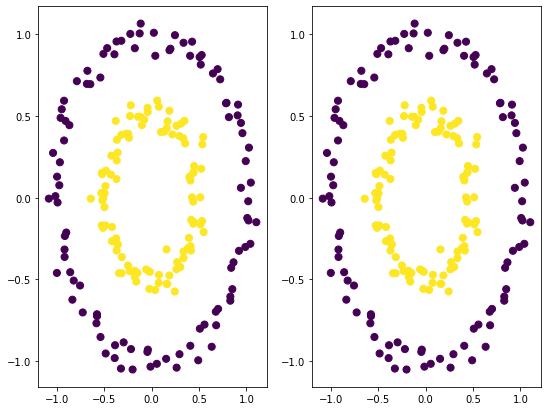

In [80]:
# Part 2: Perform Spectral Clustering on the concentric circles dataset
# Plot using colors from CY (true clusters) and CY_pred (predicted clusters)
# Code in this cell should plot 2 subplots (true labels and predicted labels)
y_pred = spectral_clustering(CX)

fig, (ax1, ax2) = matplotlib.pyplot.subplots(1,2, figsize=(9,7))
#ax1.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax1.scatter(CX[:, 0], CX[:, 1],c=CY ,s=50, cmap='viridis')
#ax2.set_title('Data with ground truth labels - linear separation not possible', fontsize=18, fontweight='demi')
ax2.scatter(CX[:, 0], CX[:, 1],c=y_pred,s=50, cmap='viridis')

## Part 3: Evaluate accuracy
Evaluate the accuracy of the clustering by comparing it with the true labels. Create two subplots (true vs predicted) with the color of each point showing the cluster label.

In [82]:
# Part 3: Report the accuracy of clustering
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(CY, y_pred))

Accuracy :  1.0


####  Spectral Clustering
Spectral CLustering :
Spectral clustering is a technique where the approach is used to identify communities of nodes in a graph based on the edges connecting them. It uses information from the eigenvalues (spectrum) of special matrices built from the graph or the data set.



---



# Question 2: Manifold Visualization
Implement the various manifold learning methods and visualize the given datasets.


## Part 1: MDS
Implement Multi-Dimensional Scaling

#### MDS :
*   Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.

*   MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces.

Let $S$ be the similarity matrix, and $X$ the coordinates of the input points. Disparities $\hat{d}_{ij}$
are transformation of the similarities chosen in some optimal ways. The objective, called the stress, is then defined by
$$\sum_{i < j} d_{ij}(X) - \hat{d}_{ij}(X)$$


In [0]:
# Part 1: MDS
from sklearn.preprocessing import StandardScaler

def distance_mat(X, n_neighbors=6):
  
    def dist(a, b):
        return np.sqrt(sum((a - b)**2))

    # Compute full distance matrix
    distances = np.array([[dist(p1, p2) for p2 in X] for p1 in X])

    # Keep only the 6 nearest neighbors, others set to 0 (= unreachable)
    neighbors = np.zeros_like(distances)
    sort_distances = np.argsort(distances, axis=1)[:, 1:n_neighbors+1]
    for k,i in enumerate(sort_distances):
        neighbors[k,i] = distances[k,i]
    return neighbors, sort_distances

def center(K):
    n_samples = K.shape[0]

    # Mean for each row/column
    meanrows = np.sum(K, axis=0) / n_samples
    meancols = (np.sum(K, axis=1)/n_samples)[:, np.newaxis]

    # Mean across all rows (entire matrix)
    meanall = meanrows.sum() / n_samples

    K -= meanrows
    K -= meancols
    K += meanall
    return K

def MDS(X, k, output_dim=2, flag=True):
    """Args:
      X: numpy.array [n_samples, input_dim]
      k: number of nearest neighbours to construct the knn graph
      output_dim: dimension of output data

      Returns:
      Y: numpy.array [n_samples, output_dim]
    """
    if flag:
        X = sklearn.metrics.pairwise_distances(X)#distance_mat(X, k) #np pairwise distancesws
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
    X = center(X)

    # Make a list of (eigenvalue, eigenvector) tuples
    eig_val_cov, eig_vec_cov = np.linalg.eig(X)
    eig_pairs = [
        (np.abs(eig_val_cov[i]), eig_vec_cov[:, i]) for i in range(len(eig_val_cov))
    ] 
    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_pairs = np.array(eig_pairs)
    matrix_w = np.hstack(
        [eig_pairs[i, 1].reshape(X.shape[1], 1) for i in range(n_components)]
    ) 
    # Return samples in new subspace
    return matrix_w
    #return Y


## Part 2: LLE
Implement Locally Linear Embedding function

#### LLE :
Locally linear embedding (LLE) seeks a lower-dimensional projection of the data which preserves distances within local neighborhoods. It can be thought of as a series of local Principal Component Analyses which are globally compared to find the best non-linear embedding.

The standard LLE algorithm comprises three stages:

. See discussion under Isomap above.

1.   Nearest Neighbors Search
2.   Weight Matrix Construction : The construction of the LLE weight matrix involves the solution of a $k \times k$ linear equation for each of the $N$ local neighborhoods.
3.   Partial Eigenvalue Decomposition



     

. The construction of the LLE weight matrix involves the solution of a linear equation for each of the

local neighborhoods

Partial Eigenvalue Decomposition. See discussion under Isomap above.

In [0]:
# Part 2: LLE

def LLE(X, k, output_dim=2):
    """Args:
      X: numpy.array [n_samples, input_dim]
      k: number of nearest neighbours to construct the knn graph
      output_dim: dimension of output data

      Returns:
      Y: numpy.array [n_samples, output_dim]
    """
    # Compute the nearest neighbors
    _, neighbors_idx = distance_mat(X, k)

    n = X.shape[0]
    w = np.zeros((n, n))
    for i in range(n):
        # Center the neighbors matrix
        k_indexes = neighbors_idx[i, :]
        neighbors = X[k_indexes, :] - X[i, :]

        # Compute the corresponding gram matrix
        gram_inv = np.linalg.pinv(np.dot(neighbors, neighbors.T))

        # Setting the weight values according to the lagrangian
        lambda_par = 2/np.sum(gram_inv)
        w[i, k_indexes] = lambda_par*np.sum(gram_inv, axis=1)/2
    m = np.subtract(np.eye(n), w)
    values, u = np.linalg.eigh(np.dot(np.transpose(m), m))
    return u[:, 1:output_dim+1]
    #return Y

## Part 3: ISOMAP
Implement Isomap Visualization  

#### ISOMAP:
Isomap seeks a lower-dimensional embedding which maintains geodesic distances between all points. It can be viewed as an extension of Multi-dimensional Scaling (MDS) or Kernel PCA.

The Isomap algorithm comprises three stages:

1.   Nearest neighbor search. Isomap uses sklearn.neighbors.BallTree for efficient neighbor search.

2.  Shortest-path graph search. The most efficient known algorithms for this are Dijkstra’s Algorithm, or the Floyd-Warshall algorithm.

3.  Partial eigenvalue decomposition. The embedding is encoded in the eigenvectors corresponding to the $d$ largest eigenvalues of the $N \times N$ isomap kernel.

In [0]:
# Part 3: Isomap

def ISOMAP(X, k, output_dim=2):
    """Args:
      X: numpy.array [n_samples, input_dim]
      k: number of nearest neighbours to construct the knn graph
      output_dim: dimension of output data

      Returns:
      Y: numpy.array [n_samples, output_dim]
    """
    #X = sklearn.metrics.pairwise_distances(X) #X, _ = distance_mat(X, k)
    X, _ = distance_mat(X, k)
    # Compute shortest paths from distance matrix
    from sklearn.utils.graph import graph_shortest_path
    graph = graph_shortest_path(X, directed=False)
    graph = -0.5 * (graph ** 2)

    # Return the MDS projection on the shortest paths graph
    return MDS(graph, k, output_dim, False)
    #return Y

## Part 3: Manifold Visualization
Visualize the S-shaped 3-d dataset using the MDS, ISOMAP, LLE

In [0]:
# DO NOT EDIT

from sklearn import manifold, datasets

SX, St = datasets.make_s_curve(n_samples=1000, random_state=1337)
# SX: input data [n_samples, 3]
# St: univariate position along manifold [n_samples], use for coloring the plots

The code in the next cell should draw a single plot with the following subplots:
1. 3D S-shaped dataset
2. 2D Manifold learnt using MDS
3. 2D Manifold learnt using ISOMAP
4. 2D Manifold learnt using LLE

Use the `St` variable to color the points in your visualizations. Use a color spectrum, and the position along the manifold to assign the color.

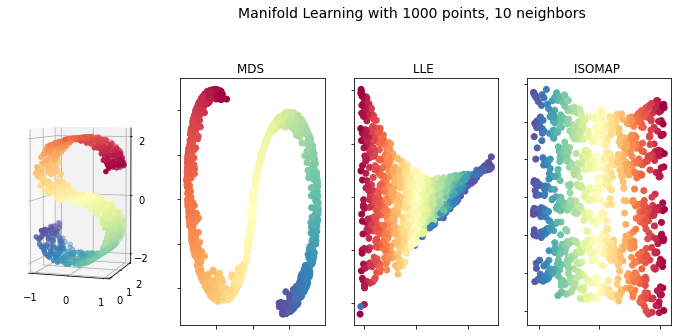

In [73]:
#  Visualization code here

n_points = 1000
n_neighbors = 10
n_components = 2

from collections import OrderedDict
from matplotlib.ticker import NullFormatter
#from functools import partial
#from time import time

# Create figure
fig = matplotlib.pyplot.figure(figsize=(15, 10))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)
ax = fig.add_subplot(251, projection='3d')
ax.scatter(SX[:, 0], SX[:, 1], SX[:, 2], c=St, cmap=matplotlib.pyplot.cm.Spectral)
ax.view_init(4, -72)

outputs = []
#X=SX.copy()
outputs.append(MDS(SX, n_neighbors, n_components, True))
#X=SX.copy()
outputs.append(LLE(SX, n_neighbors, n_components))

outputs.append(ISOMAP(SX, n_neighbors, n_components))


i=0
label = ['MDS', 'LLE', 'ISOMAP']
for Y in outputs:
    #t0 = time()
    #Y = method.fit_transform(X)
    #t1 = time()
    #print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=St, cmap=matplotlib.pyplot.cm.Spectral)
    ax.set_title("%s " % label[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    i+=1
matplotlib.pyplot.show()


# Question 3: Clustering and Visualizing high-dimensional data
Perform k-means and spectral clustering on the Swiss roll dataset and visualize using the above 3 methods. State your observations.

In [61]:
# Swiss roll dataset loading here
d = []
with open('/content//swissroll.dat', 'r') as dat_file:
    for line in dat_file:
        line = line.strip().split()
        line = [float(x.strip()) for x in line]
        d.append(line)
swissroll = numpy.array(d)
print (swissroll.shape)

(1600, 3)


Procedure for this question:
1. Perform spectral clustering (2 clusters) on the unchanged Swiss roll and visualize (binary colors)
2. Unwrap the manifold in 2D and visualize using
  - MDS
  - ISOMAP
  - LLE

Use the labels from the spectral clustering to color the unwrapped manifolds.

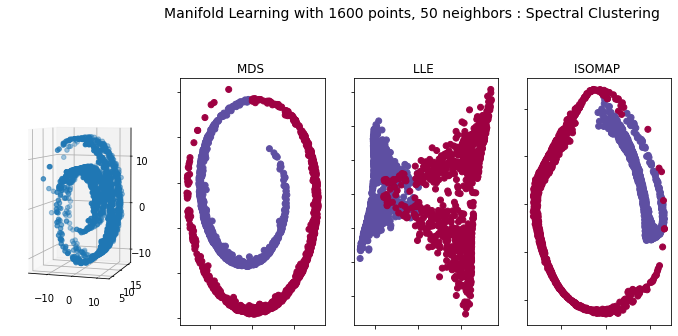

In [89]:
# CODE HERE
# Plot result
#n_points = 1000
n_neighbors = 50
n_components = 2

fig = matplotlib.pyplot.figure(figsize=(15, 10))
fig.suptitle("Manifold Learning with %i points, %i neighbors : Spectral Clustering"
             % (swissroll.shape[0], n_neighbors), fontsize=14)
ax = fig.add_subplot(251, projection='3d')
ax.scatter(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], cmap=matplotlib.pyplot.cm.Spectral)
ax.view_init(4, -72)

outputs = []
outputs.append(MDS(swissroll, n_neighbors, n_components, True))
outputs.append(LLE(swissroll, n_neighbors, n_components))
outputs.append(ISOMAP(swissroll, n_neighbors, n_components))
y_pred = spectral_clustering(swissroll, radius=6)
i=0
label = ['MDS', 'LLE', 'ISOMAP']
for Y in outputs:
    #t0 = time()
    #Y = method.fit_transform(X)
    #t1 = time()
    #print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=y_pred, cmap=matplotlib.pyplot.cm.Spectral)
    ax.set_title("%s " % label[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    i+=1
matplotlib.pyplot.show()

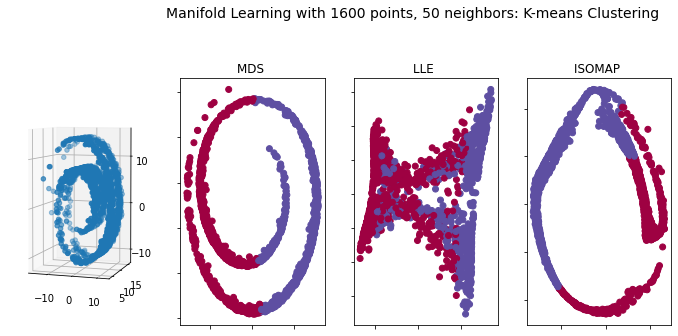

In [90]:
from sklearn.cluster import KMeans

n_neighbors = 50
n_components = 2

fig = matplotlib.pyplot.figure(figsize=(15, 10))
fig.suptitle("Manifold Learning with %i points, %i neighbors: K-means Clustering"
             % (swissroll.shape[0], n_neighbors), fontsize=14)
ax = fig.add_subplot(251, projection='3d')
ax.scatter(swissroll[:, 0], swissroll[:, 1], swissroll[:, 2], cmap=matplotlib.pyplot.cm.Spectral)
ax.view_init(4, -72)

outputs = []
outputs.append(MDS(swissroll, n_neighbors, n_components, True))
outputs.append(LLE(swissroll, n_neighbors, n_components))
outputs.append(ISOMAP(swissroll, n_neighbors, n_components))
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(swissroll)
i=0
label = ['MDS', 'LLE', 'ISOMAP']
for Y in outputs:
    #t0 = time()
    #Y = method.fit_transform(X)
    #t1 = time()
    #print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=y_pred, cmap=matplotlib.pyplot.cm.Spectral)
    ax.set_title("%s " % label[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    i+=1
matplotlib.pyplot.show()



---



### Observation :

K-Means observations : 
 The k-means algorithm works reasonably well when the data fits the cluster model i.e, 

*  The clusters are spherical: the data points in a cluster are centered around that cluster
*  The spread/variance of the clusters is similar: Each data point belongs to the closest cluster

The Swissroll cluster have the same scatter though they are not spherical. The k-means algorithm never assigns correctly the tips of the shapes because the spherical assumption fails.


> K-means fails in assigning correct labels at tip of the Swissroll shape because spherical assumption by k-means fails. This can be observed in tips of both LLE and ISOMAP.

Spectral CLustering :
Spectral clustering is a technique where the approach is used to identify communities of nodes in a graph based on the edges connecting them. It uses information from the eigenvalues (spectrum) of special matrices built from the graph or the data set.



> Clustering using spectral clustering produces clusters which are on the fold unlike k-means.






# Question 4: Classification

Perform classification using a machine learning algorithm of your choice. Use 6k images from CIFAR-10 dataset.(5k images for training and 1k images for testing.)


*   Do dimensionality reduction on the dataset using PCA and ISOMAP.
*   Apply the classification algorithm.
*   Compare the results by changing the dimensionality of the data.
*   Use F1-score as metric.
*   Approach: Reduce the dimensionality into any two dimensions(of your choice) which are less than the initial dimensionality of the data using PCA and ISOMAP. Compare the performance metrics(F1-score) for the low dimensional data.



In [0]:
# Code for loading CIFAR-10 dataset.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train[:5000].reshape([5000,32*32*3])
y_train = y_train[:5000]
X_test = X_test[:1000].reshape([1000,32*32*3])
y_test = y_test[:1000]
# Initial dimensionality/number of features (32*32*3) = 3072.

In [0]:
from sklearn.decomposition import PCA

def reductionUsingPCA(X, k, output_dim):
    """Args:
      X: numpy.array [n_samples, input_dim]
      k: number of nearest neighbours to construct the knn graph
      output_dim: dimension of output data

      Returns:
      pca_X: numpy.array [n_samples, output_dim]
    """
    pca_obj = PCA(output_dim)
    pca_X = pca_obj.fit_transform(X)
    return pca_obj, pca_X

In [0]:
from sklearn import manifold

def reductionUsingISOMAP(X, k, output_dim):
    """Args:
      X: numpy.array [n_samples, input_dim]
      k: number of nearest neighbours to construct the knn graph
      output_dim: dimension of output data

      Returns:
      isomap_X: numpy.array [n_samples, output_dim]
    """
    isomap_obj = manifold.Isomap(k, output_dim)
    isomap_X = isomap_obj.fit_transform(X)
    return isomap_obj, isomap_X

In [0]:
# Classification Algorithm 
# Extra functions here
from sklearn.svm import SVC

def classification(x_train, y_train, x_test, n_classes):
    clf = SVC()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    #accuracy = clf.score(X_test, y_test)
    #print("Accuracy :", accuracy)
    return y_pred

In [0]:
from sklearn.metrics import f1_score

def F1_score(y_true, y_pred):
  """Args:
    y_true: numpy.array [n_samples] , ground truth value
    y_pred: numpy.array [n_samples] , predicted value by classifier
    
    Returns:
    score: float, f1-score
  """
  score = f1_score(y_true, y_pred, average='micro')
  #print("F1 score :", score)
  return score



> PCA with 200 dimensions



In [20]:
pca_obj, X_train = reductionUsingPCA(X_train, 0, 200)
X_test = pca_obj.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using PCA reduction:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using PCA reduction: 0.429




> ISOMAP with 200 dimensions



In [22]:
isomap_obj, X_train = reductionUsingISOMAP(X_train, 3, 200)
X_test = isomap_obj.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using ISOMAP reduction:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using ISOMAP reduction: 0.324




> PCA with 1000 dimensions



In [93]:
pca_obj, X_train = reductionUsingPCA(X_train, 0, 1000)
X_test = pca_obj.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using PCA reduction with 1000 dimensions:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using PCA reduction with 1000 dimensions: 0.428




> ISOMAP with 1000 dimensions



In [94]:
isomap_obj, X_train = reductionUsingISOMAP(X_train, 3, 1000)
X_test = isomap_obj.transform(X_test)
y_pred = classification(X_train, y_train, X_test, n_classes=10)
score = F1_score(y_test, y_pred)
print("F1 score using ISOMAP reduction with 1000 dimensions:", score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score using ISOMAP reduction with 1000 dimensions: 0.307


### Observation on results using PCA and ISOMAP:



*   PCA gives better results than ISOMAP. This can be regarded to the fact that PCA uses covariance matrix for dimensionality reduction by projecting the data in direction of maximum variance which is a better metric for classification. And then performs eigenvalue decomposition of this covariance matrix to find the low dimensional embedding of the dataset.
*   ISOMAP tries to preserve the geodesic distances in the lower dimension by creating a neighborhood network. After that, it uses graph distance to the approximate geodesic distance between all pairs of points. And then, through eigenvalue decomposition of the geodesic distance matrix, it finds the low dimensional embedding of the dataset.



> The covariance matrix used by PCA is a better metric for classification purpose as it is finding low dimensional embeddings in the direction of maximium variance as against ISOMAP which is using local neighborhood information (geodesic distance ) which might not suit for classification purpose. 


#### Observation on number of components :

Both PCA and ISOMAP perform similar with varying dimension but this is because the percent of information conatained in data with 200 and 1000 dimension is not much different.

>   Difference could be observed in performace of PCA if the amount of variance information contained in specific number of dimensions is less. This happens when we take reduced dimensions with 60% of variance information vs 95% variance information.

> In case of ISOMAP, taking a particular number of dimensions means we are considering a certain amount of closeness in the nearest graph of data. Hence as the number of dimensions change, the nearest neighbor informaiton present changes and hence the results might be affected.





